In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
#!pip install vecstack
#from vecstack import stacking



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
gdrive_path = '/content/gdrive/My Drive/'
data = pd.read_csv('{}/heart_failure_clinical_records_dataset.csv'.format(gdrive_path))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#Gender Count
print("Male count:{}".format(data['sex'].tolist().count(1)))
print("Female count:{}".format(data['sex'].tolist().count(0)))


Male count:194
Female count:105


In [ ]:
#Class imbalance

print("Deceased count:{}".format(data['DEATH_EVENT'].tolist().count(1)))
print("Alive count:{}".format(data['DEATH_EVENT'].tolist().count(0)))

Deceased count:96
Alive count:203


In [ ]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
Y = data['DEATH_EVENT']
X = data.drop('DEATH_EVENT', axis=1)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
289,90.0,1,337,0,38,0,390000.00,0.90,144,0,0,256
170,51.0,1,582,1,35,0,263358.03,1.50,136,1,1,145
292,52.0,0,190,1,38,0,382000.00,1.00,140,1,1,258
106,55.0,0,748,0,45,0,263000.00,1.30,137,1,0,88
216,70.0,0,1202,0,50,1,358000.00,0.90,141,0,0,196
...,...,...,...,...,...,...,...,...,...,...,...,...
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27
157,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120
60,45.0,0,7702,1,25,1,390000.00,1.00,139,1,0,60
38,60.0,0,2656,1,30,0,305000.00,2.30,137,1,0,30


In [ ]:
# Create classifer object
dt = DecisionTreeClassifier(criterion='entropy')
lr = LogisticRegression(max_iter=1500)
rf = RandomForestClassifier()
svc = SVC(kernel='linear')
abc = AdaBoostClassifier(n_estimators=50)
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=50)
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.001,max_depth=10)
gnb = GaussianNB()
etc = ExtraTreesClassifier(max_depth=10)

# Train Classifer
model11 = dt.fit(X_train, y_train)
model12 = lr.fit(X_train, y_train)
model13 = rf.fit(X_train, y_train)
model14 = svc.fit(X_train, y_train)
model15 = abc.fit(X_train, y_train)
model16 = sgd.fit(X_train, y_train)
model17 = gbm.fit(X_train, y_train)
model18 = gnb.fit(X_train, y_train)
model19 = etc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred1 = model11.predict(X_test)
y_pred2 = model12.predict(X_test)
y_pred3 = model13.predict(X_test)
y_pred4 = model14.predict(X_test)
y_pred5 = model15.predict(X_test)
y_pred6 = model16.predict(X_test)
y_pred7 = model17.predict(X_test)
y_pred8 = model18.predict(X_test)
y_pred9 = model19.predict(X_test)

In [ ]:
# Models Accuracy

a11 = metrics.accuracy_score(y_test, y_pred1)
a12 = metrics.accuracy_score(y_test, y_pred2)
a13 = metrics.accuracy_score(y_test, y_pred3)
a14 = metrics.accuracy_score(y_test, y_pred4)
a15 = metrics.accuracy_score(y_test, y_pred5)
a16 = metrics.accuracy_score(y_test, y_pred6)
a17 = metrics.accuracy_score(y_test, y_pred7)
a18 = metrics.accuracy_score(y_test, y_pred8)
a19 = metrics.accuracy_score(y_test, y_pred9)

print("Accuracy of Decision Tree:",a11)
print("Accuracy of Logistic Regression:",a12)
print("Accuracy of Random Forest:",a13)
print("Accuracy of Support Vector Machine:",a14)
print("Accuracy of AdaBoost:",a15)
print("Accuracy of Stochastic Gradient Classifier:",a16)
print("Accuracy of Gradient Boosting Classifier:",a17)
print("Accuracy of Gaussian Naive Bayes classifier:",a18)
print("Accuracy of Extra Tree Classifier:",a19)

Accuracy of Decision Tree: 0.8444444444444444
Accuracy of Logistic Regression: 0.7888888888888889
Accuracy of Random Forest: 0.8222222222222222
Accuracy of Support Vector Machine: 0.7777777777777778
Accuracy of AdaBoost: 0.8222222222222222
Accuracy of Stochastic Gradient Classifier: 0.6777777777777778
Accuracy of Gradient Boosting Classifier: 0.6777777777777778
Accuracy of Gaussian Naive Bayes classifier: 0.8
Accuracy of Extra Tree Classifier: 0.7777777777777778


In [ ]:
#Models Precision

p11 = metrics.precision_score(y_test, y_pred1)
p12 = metrics.precision_score(y_test, y_pred2)
p13 = metrics.precision_score(y_test, y_pred3)
p14 = metrics.precision_score(y_test, y_pred4)
p15 = metrics.precision_score(y_test, y_pred5)
p16 = metrics.precision_score(y_test, y_pred6,average="weighted")
p17 = metrics.precision_score(y_test, y_pred7,average = 'weighted')
p18 = metrics.precision_score(y_test, y_pred8)
p19 = metrics.precision_score(y_test, y_pred9)


print('Precision of Decision Tree:',p11)
print('Precision of Logistic Regression:',p12)
print('Precision of Random Forest:',p13)
print('Precision of Support Vector Machine:',p14)
print('Precision of AdaBoost:',p15)
print('Precision of Stochastic Gradient Classifier:',p16)
print('Precision of Gradient Boosting Classifier:',p17)
print('Precision of Gaussian Naive Bayes classifier:',p18)
print('Precision of Extra Tree Classifier:',p19)

Precision of Decision Tree: 0.8571428571428571
Precision of Logistic Regression: 0.75
Precision of Random Forest: 0.9333333333333333
Precision of Support Vector Machine: 0.8
Precision of AdaBoost: 0.8095238095238095
Precision of Stochastic Gradient Classifier: 0.45938271604938274
Precision of Gradient Boosting Classifier: 0.45938271604938274
Precision of Gaussian Naive Bayes classifier: 0.8666666666666667
Precision of Extra Tree Classifier: 0.9090909090909091


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Models recall
r11 = metrics.recall_score(y_test, y_pred1)
r12 = metrics.recall_score(y_test, y_pred2)
r13 = metrics.recall_score(y_test, y_pred3)
r14 = metrics.recall_score(y_test, y_pred4)
r15 = metrics.recall_score(y_test, y_pred5)
r16 = metrics.recall_score(y_test, y_pred6, average = 'weighted')
r17 = metrics.recall_score(y_test, y_pred7,average = 'weighted')
r18 = metrics.recall_score(y_test, y_pred8)
r19 = metrics.recall_score(y_test, y_pred9)

print('Recall of Decision Tree:',r11)
print('Recall of Logistic Regression:',r12)
print('Recall of Random Forest:',r13)
print('Recall of Support Vector Machine:',r14)
print('Recall of AdaBoost:',r15)
print('Recall of Stochastic Gradient Classifier:',r16)
print('Recall of Gradient Boosting Classifier:',r17)
print('Recall of Gaussian Naive Bayes classifier:',r18)
print('Recall of Extra Tree Classifier:',r19)

Recall of Decision Tree: 0.6206896551724138
Recall of Logistic Regression: 0.5172413793103449
Recall of Random Forest: 0.4827586206896552
Recall of Support Vector Machine: 0.41379310344827586
Recall of AdaBoost: 0.5862068965517241
Recall of Stochastic Gradient Classifier: 0.6777777777777778
Recall of Gradient Boosting Classifier: 0.6777777777777778
Recall of Gaussian Naive Bayes classifier: 0.4482758620689655
Recall of Extra Tree Classifier: 0.3448275862068966


In [ ]:
#Models f-score
f11 = metrics.f1_score(y_test, y_pred1)
f12 = metrics.f1_score(y_test, y_pred2)
f13 = metrics.f1_score(y_test, y_pred3)
f14 = metrics.f1_score(y_test, y_pred4)
f15 = metrics.f1_score(y_test, y_pred5)
f16 = metrics.f1_score(y_test, y_pred6,average = 'weighted')
f17 = metrics.f1_score(y_test, y_pred7,average = 'weighted')
f18 = metrics.f1_score(y_test, y_pred8)
f19 = metrics.f1_score(y_test, y_pred9)

print('f-score of Decision Tree:',f11)
print('f-score of Logistic Regression:',f12)
print('f-score of Random Forest:',f13)
print('f-score of Support Vector Machine:',f14)
print('f-score of AdaBoost:',f15)
print('f-score of Stochastic Gradient Classifier:',f16)
print('f-score of Gradient Boosting Classifier:',f17)
print('f-score of Gaussian Naive Bayes classifier:',f18)
print('f-score of Extra Tree Classifier:',f19)

f-score of Decision Tree: 0.7200000000000001
f-score of Logistic Regression: 0.6122448979591838
f-score of Random Forest: 0.6363636363636364
f-score of Support Vector Machine: 0.5454545454545454
f-score of AdaBoost: 0.68
f-score of Stochastic Gradient Classifier: 0.5476085356880058
f-score of Gradient Boosting Classifier: 0.5476085356880058
f-score of Gaussian Naive Bayes classifier: 0.5909090909090909
f-score of Extra Tree Classifier: 0.5000000000000001


In [ ]:
## Python program to understand the usage of tabulate function for printing tables in a tabular format
from tabulate import tabulate
tdata = [['Decision Tree',a11, p11, r11, f11],
['Logistic Regression',a12, p12, r12, f12],
['Random Forest',a13, p13, r13, f13],
['Support Vector Machine',a14, p14, r14, f14],
['AdaBoost',a15, p15, r15, f15],
['Stochastic Gradient',a16, p16, r16, f16],
['Gradient Boosting',a17, p17, r17, f17],
['Gaussian Naive Bayes',a18, p18, r18, f18],
['Extra Tree Classifier',a19, p19, r19, f19]]
print (tabulate(tdata, headers=["Models", "Accuracy", "Precision", "Recall","F-Score"]))

Models                    Accuracy    Precision    Recall    F-Score
----------------------  ----------  -----------  --------  ---------
Decision Tree             0.844444     0.857143  0.62069    0.72
Logistic Regression       0.788889     0.75      0.517241   0.612245
Random Forest             0.822222     0.933333  0.482759   0.636364
Support Vector Machine    0.777778     0.8       0.413793   0.545455
AdaBoost                  0.822222     0.809524  0.586207   0.68
Stochastic Gradient       0.677778     0.459383  0.677778   0.547609
Gradient Boosting         0.677778     0.459383  0.677778   0.547609
Gaussian Naive Bayes      0.8          0.866667  0.448276   0.590909
Extra Tree Classifier     0.777778     0.909091  0.344828   0.5


With SMOTE:

In [ ]:
#Defining Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,90.000000,1,337,0,38,0,390000.000000,0.900000,144,0,0,256
1,51.000000,1,582,1,35,0,263358.030000,1.500000,136,1,1,145
2,52.000000,0,190,1,38,0,382000.000000,1.000000,140,1,1,258
3,55.000000,0,748,0,45,0,263000.000000,1.300000,137,1,0,88
4,70.000000,0,1202,0,50,1,358000.000000,0.900000,141,0,0,196
...,...,...,...,...,...,...,...,...,...,...,...,...
279,54.294844,0,1402,0,32,0,69416.702186,1.243588,135,0,0,160
280,66.044686,0,545,0,36,0,452727.053182,0.841787,136,1,0,41
281,76.598594,1,526,0,32,0,225106.572937,1.741544,134,1,0,104
282,73.686979,0,582,0,31,0,225656.510428,2.195457,134,1,0,94


In [ ]:
# Train Classifer
model21 = dt.fit(X_train, y_train)
model22 = lr.fit(X_train, y_train)
model23 = rf.fit(X_train, y_train)
model24 = svc.fit(X_train, y_train)
model25 = abc.fit(X_train, y_train)
model26 = sgd.fit(X_train, y_train)
model27 = gbm.fit(X_train, y_train)
model28 = gnb.fit(X_train, y_train)
model29 = etc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred1 = model21.predict(X_test)
y_pred2 = model22.predict(X_test)
y_pred3 = model23.predict(X_test)
y_pred4 = model24.predict(X_test)
y_pred5 = model25.predict(X_test)
y_pred6 = model26.predict(X_test)
y_pred7 = model27.predict(X_test)
y_pred8 = model28.predict(X_test)
y_pred9 = model29.predict(X_test)

In [ ]:
# Models Accuracy

a21 = metrics.accuracy_score(y_test, y_pred1)
a22 = metrics.accuracy_score(y_test, y_pred2)
a23 = metrics.accuracy_score(y_test, y_pred3)
a24 = metrics.accuracy_score(y_test, y_pred4)
a25 = metrics.accuracy_score(y_test, y_pred5)
a26 = metrics.accuracy_score(y_test, y_pred6)
a27 = metrics.accuracy_score(y_test, y_pred7)
a28 = metrics.accuracy_score(y_test, y_pred8)
a29 = metrics.accuracy_score(y_test, y_pred9)

print("Accuracy of Decision Tree:",a21)
print("Accuracy of Logistic Regression:",a22)
print("Accuracy of Random Forest:",a23)
print("Accuracy of Support Vector Machine:",a24)
print("Accuracy of AdaBoost:",a25)
print("Accuracy of Stochastic Gradient Classifier:",a26)
print("Accuracy of Gradient Boosting Classifier:",a27)
print("Accuracy of Gaussian Naive Bayes classifier:",a28)
print("Accuracy of Extra Tree Classifier:",a29)

Accuracy of Decision Tree: 0.7888888888888889
Accuracy of Logistic Regression: 0.7666666666666667
Accuracy of Random Forest: 0.8555555555555555
Accuracy of Support Vector Machine: 0.7555555555555555
Accuracy of AdaBoost: 0.7888888888888889
Accuracy of Stochastic Gradient Classifier: 0.6777777777777778
Accuracy of Gradient Boosting Classifier: 0.7888888888888889
Accuracy of Gaussian Naive Bayes classifier: 0.7777777777777778
Accuracy of Extra Tree Classifier: 0.8111111111111111


In [ ]:
#Models Precision

p21 = metrics.precision_score(y_test, y_pred1)
p22 = metrics.precision_score(y_test, y_pred2)
p23 = metrics.precision_score(y_test, y_pred3)
p24 = metrics.precision_score(y_test, y_pred4)
p25 = metrics.precision_score(y_test, y_pred5)
p26 = metrics.precision_score(y_test, y_pred6,average = 'weighted')
p27 = metrics.precision_score(y_test, y_pred7)
p28 = metrics.precision_score(y_test, y_pred8)
p29 = metrics.precision_score(y_test, y_pred9)


print('Precision of Decision Tree:',p21)
print('Precision of Logistic Regression:',p22)
print('Precision of Random Forest:',p23)
print('Precision of Support Vector Machine:',p24)
print('Precision of AdaBoost:',p25)
print('Precision of Stochastic Gradient Classifier:',p26)
print('Precision of Gradient Boosting Classifier:',p27)
print('Precision of Gaussian Naive Bayes classifier:',p28)
print('Precision of Extra Tree Classifier:',p29)

Precision of Decision Tree: 0.7272727272727273
Precision of Logistic Regression: 0.6428571428571429
Precision of Random Forest: 0.8636363636363636
Precision of Support Vector Machine: 0.6129032258064516
Precision of AdaBoost: 0.6923076923076923
Precision of Stochastic Gradient Classifier: 0.45938271604938274
Precision of Gradient Boosting Classifier: 0.7083333333333334
Precision of Gaussian Naive Bayes classifier: 0.6956521739130435
Precision of Extra Tree Classifier: 0.7727272727272727


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Models recall
r21 = metrics.recall_score(y_test, y_pred1)
r22 = metrics.recall_score(y_test, y_pred2)
r23 = metrics.recall_score(y_test, y_pred3)
r24 = metrics.recall_score(y_test, y_pred4)
r25 = metrics.recall_score(y_test, y_pred5)
r26 = metrics.recall_score(y_test, y_pred6,average = 'weighted')
r27 = metrics.recall_score(y_test, y_pred7)
r28 = metrics.recall_score(y_test, y_pred8)
r29 = metrics.recall_score(y_test, y_pred9)

print('Recall of Decision Tree:',r21)
print('Recall of Logistic Regression:',r22)
print('Recall of Random Forest:',r23)
print('Recall of Support Vector Machine:',r24)
print('Recall of AdaBoost:',r25)
print('Recall of Stochastic Gradient Classifier:',r26)
print('Recall of Gradient Boosting Classifier:',r27)
print('Recall of Gaussian Naive Bayes classifier:',r28)
print('Recall of Extra Tree Classifier:',r29)

Recall of Decision Tree: 0.5517241379310345
Recall of Logistic Regression: 0.6206896551724138
Recall of Random Forest: 0.6551724137931034
Recall of Support Vector Machine: 0.6551724137931034
Recall of AdaBoost: 0.6206896551724138
Recall of Stochastic Gradient Classifier: 0.6777777777777778
Recall of Gradient Boosting Classifier: 0.5862068965517241
Recall of Gaussian Naive Bayes classifier: 0.5517241379310345
Recall of Extra Tree Classifier: 0.5862068965517241


In [ ]:
#Models f-score
f21 = metrics.f1_score(y_test, y_pred1)
f22 = metrics.f1_score(y_test, y_pred2)
f23 = metrics.f1_score(y_test, y_pred3)
f24 = metrics.f1_score(y_test, y_pred4)
f25 = metrics.f1_score(y_test, y_pred5)
f26 = metrics.f1_score(y_test, y_pred6,average = 'weighted')
f27 = metrics.f1_score(y_test, y_pred7)
f28 = metrics.f1_score(y_test, y_pred8)
f29 = metrics.f1_score(y_test, y_pred9)

print('f-score of Decision Tree:',f21)
print('f-score of Logistic Regression:',f22)
print('f-score of Random Forest:',f23)
print('f-score of Support Vector Machine:',f24)
print('f-score of AdaBoost:',f25)
print('f-score of Stochastic Gradient Classifier:',f26)
print('f-score of Gradient Boosting Classifier:',f27)
print('f-score of Gaussian Naive Bayes classifier:',f28)
print('f-score of Extra Tree Classifier:',f29)

f-score of Decision Tree: 0.6274509803921569
f-score of Logistic Regression: 0.6315789473684211
f-score of Random Forest: 0.7450980392156864
f-score of Support Vector Machine: 0.6333333333333333
f-score of AdaBoost: 0.6545454545454545
f-score of Stochastic Gradient Classifier: 0.5476085356880058
f-score of Gradient Boosting Classifier: 0.6415094339622641
f-score of Gaussian Naive Bayes classifier: 0.6153846153846154
f-score of Extra Tree Classifier: 0.6666666666666667


In [ ]:
from tabulate import tabulate
tdata = [['Decision Tree',a21, p21, r21, f21],
['Logistic Regression',a22, p22, r22, f22],
['Random Forest',a23, p23, r23, f23],
['Support Vector Machine',a24, p24, r24, f24],
['AdaBoost',a25, p25, r25, f25],
['Stochastic Gradient',a26, p26, r26, f26],
['Gradient Boosting',a27, p27, r27, f27],
['Gaussian Naive Bayes',a28, p28, r28, f28],
['Extra Tree Classifier',a29, p29, r29, f29]]
print (tabulate(tdata, headers=["Models", "Accuracy", "Precision", "Recall","F-Score"]))

Models                    Accuracy    Precision    Recall    F-Score
----------------------  ----------  -----------  --------  ---------
Decision Tree             0.788889     0.727273  0.551724   0.627451
Logistic Regression       0.766667     0.642857  0.62069    0.631579
Random Forest             0.855556     0.863636  0.655172   0.745098
Support Vector Machine    0.755556     0.612903  0.655172   0.633333
AdaBoost                  0.788889     0.692308  0.62069    0.654545
Stochastic Gradient       0.677778     0.459383  0.677778   0.547609
Gradient Boosting         0.788889     0.708333  0.586207   0.641509
Gaussian Naive Bayes      0.777778     0.695652  0.551724   0.615385
Extra Tree Classifier     0.811111     0.772727  0.586207   0.666667


With prominent features and SMOTE:


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:

sel = RandomForestClassifier(n_estimators = 100)
sel.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
feat_score = sel.feature_importances_*100
feat_score

array([ 9.68620071,  1.51094556,  9.30760925,  1.26509224, 11.60959247,
        1.51173856,  9.2492832 , 12.10061672,  7.66666139,  1.01995863,
        1.1146157 , 33.95768556])

In [ ]:
dict1=dict(enumerate(feat_score))
sorted_keys = sorted(dict1, key=dict1.get,reverse=True)
dict2={}
for w in sorted_keys:
    dict2[w] = dict1[w]

print(dict2)


{11: 33.95768555688541, 7: 12.100616723701652, 4: 11.609592473632175, 0: 9.68620071335205, 2: 9.30760925179817, 6: 9.249283197172591, 8: 7.666661387869168, 5: 1.5117385598983106, 1: 1.5109455640587146, 3: 1.2650922411555412, 10: 1.1146157003695838, 9: 1.0199586301066443}


Text(0.5, 0, 'Score')

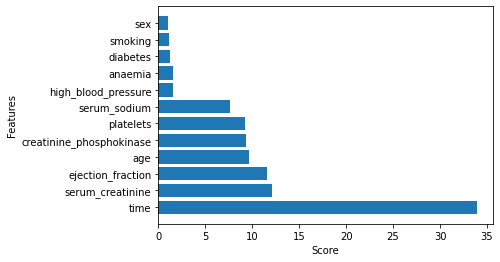

In [ ]:
#Feature Importance
x= list(dict2.values())

# getting values against each value of x
y = list(data.columns[list(dict2.keys())])
plt.barh(y, x)

# # setting label of y-axis
plt.ylabel("Features")

# # setting label of x-axis
plt.xlabel("Score")

In [ ]:
selected_feat_idx = list(dict2.keys())[-3:None]
selected_feat_idx

[3, 10, 9]

In [ ]:
selected_feat = []
for i in selected_feat_idx:
  selected_feat.append(data.columns[i])
print(selected_feat)

['diabetes', 'smoking', 'sex']


In [ ]:
Y = data['DEATH_EVENT']
X = data.drop('DEATH_EVENT', axis=1)
for it in selected_feat:
  X = X.drop(it, axis = 1)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test
X_train

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time
192,50.0,1,121,40,0,260000.0,0.7,130,175
117,85.0,1,102,60,0,507000.0,3.2,138,94
293,63.0,1,103,35,0,179000.0,0.9,136,270
108,63.0,0,936,38,0,304000.0,1.1,133,88
123,60.0,1,582,30,1,127000.0,0.9,145,95
...,...,...,...,...,...,...,...,...,...
112,50.0,0,369,25,0,252000.0,1.6,136,90
171,52.0,0,3966,40,0,325000.0,0.9,140,146
115,58.0,1,400,40,0,164000.0,1.0,139,91
0,75.0,0,582,20,1,265000.0,1.9,130,4


In [ ]:
#smote
X_train, y_train = sm.fit_resample(X_train, y_train)
X_train

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time
0,50.000000,1,121,40,0,260000.000000,0.700000,130,175
1,85.000000,1,102,60,0,507000.000000,3.200000,138,94
2,63.000000,1,103,35,0,179000.000000,0.900000,136,270
3,63.000000,0,936,38,0,304000.000000,1.100000,133,88
4,60.000000,1,582,30,1,127000.000000,0.900000,145,95
...,...,...,...,...,...,...,...,...,...
293,85.984796,1,170,48,0,225073.414408,1.247089,137,76
294,69.281687,0,573,37,1,178176.027181,1.128169,138,36
295,78.011160,0,3216,30,0,243465.922689,1.093185,136,69
296,84.904915,0,582,29,1,264144.022447,1.863508,132,15


In [ ]:
#Balanced Class
y_train.value_counts()

0    149
1    149
Name: DEATH_EVENT, dtype: int64

In [ ]:
# Train Classifer
model31 = dt.fit(X_train, y_train)
model32 = lr.fit(X_train, y_train)
model33 = rf.fit(X_train, y_train)
model34 = svc.fit(X_train, y_train)
model35 = abc.fit(X_train, y_train)
model36 = sgd.fit(X_train, y_train)
model37 = gbm.fit(X_train, y_train)
model38 = gnb.fit(X_train, y_train)
model39 = etc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred1 = model31.predict(X_test)
y_pred2 = model32.predict(X_test)
y_pred3 = model33.predict(X_test)
y_pred4 = model34.predict(X_test)
y_pred5 = model35.predict(X_test)
y_pred6 = model36.predict(X_test)
y_pred7 = model37.predict(X_test)
y_pred8 = model38.predict(X_test)
y_pred9 = model39.predict(X_test)

In [ ]:
# Models Accuracy

a31 = metrics.accuracy_score(y_test, y_pred1)
a32 = metrics.accuracy_score(y_test, y_pred2)
a33 = metrics.accuracy_score(y_test, y_pred3)
a34 = metrics.accuracy_score(y_test, y_pred4)
a35 = metrics.accuracy_score(y_test, y_pred5)
a36 = metrics.accuracy_score(y_test, y_pred6)
a37 = metrics.accuracy_score(y_test, y_pred7)
a38 = metrics.accuracy_score(y_test, y_pred8)
a39 = metrics.accuracy_score(y_test, y_pred9)

print("Accuracy of Decision Tree:",a31)
print("Accuracy of Logistic Regression:",a32)
print("Accuracy of Random Forest:",a33)
print("Accuracy of Support Vector Machine:",a34)
print("Accuracy of AdaBoost:",a35)
print("Accuracy of Stochastic Gradient Classifier:",a36)
print("Accuracy of Gradient Boosting Classifier:",a37)
print("Accuracy of Gaussian Naive Bayes classifier:",a38)
print("Accuracy of Extra Tree Classifier:",a39)

Accuracy of Decision Tree: 0.7111111111111111
Accuracy of Logistic Regression: 0.7222222222222222
Accuracy of Random Forest: 0.7333333333333333
Accuracy of Support Vector Machine: 0.7
Accuracy of AdaBoost: 0.7555555555555555
Accuracy of Stochastic Gradient Classifier: 0.4
Accuracy of Gradient Boosting Classifier: 0.7111111111111111
Accuracy of Gaussian Naive Bayes classifier: 0.7555555555555555
Accuracy of Extra Tree Classifier: 0.7777777777777778


In [ ]:
#Models Precision

p31 = metrics.precision_score(y_test, y_pred1)
p32 = metrics.precision_score(y_test, y_pred2)
p33 = metrics.precision_score(y_test, y_pred3)
p34 = metrics.precision_score(y_test, y_pred4)
p35 = metrics.precision_score(y_test, y_pred5)
p36 = metrics.precision_score(y_test, y_pred6,average = 'weighted')
p37 = metrics.precision_score(y_test, y_pred7)
p38 = metrics.precision_score(y_test, y_pred8)
p39 = metrics.precision_score(y_test, y_pred9)


print('Precision of Decision Tree:',p31)
print('Precision of Logistic Regression:',p32)
print('Precision of Random Forest:',p33)
print('Precision of Support Vector Machine:',p34)
print('Precision of AdaBoost:',p35)
print('Precision of Stochastic Gradient Classifier:',p36)
print('Precision of Gradient Boosting Classifier:',p37)
print('Precision of Gaussian Naive Bayes classifier:',p38)
print('Precision of Extra Tree Classifier:',p39)

Precision of Decision Tree: 0.65625
Precision of Logistic Regression: 0.6666666666666666
Precision of Random Forest: 0.6875
Precision of Support Vector Machine: 0.6285714285714286
Precision of AdaBoost: 0.7692307692307693
Precision of Stochastic Gradient Classifier: 0.16
Precision of Gradient Boosting Classifier: 0.6666666666666666
Precision of Gaussian Naive Bayes classifier: 0.7333333333333333
Precision of Extra Tree Classifier: 0.7857142857142857


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Models recall
r31 = metrics.recall_score(y_test, y_pred1)
r32 = metrics.recall_score(y_test, y_pred2)
r33 = metrics.recall_score(y_test, y_pred3)
r34 = metrics.recall_score(y_test, y_pred4)
r35 = metrics.recall_score(y_test, y_pred5)
r36 = metrics.recall_score(y_test, y_pred6,average = 'weighted')
r37 = metrics.recall_score(y_test, y_pred7)
r38 = metrics.recall_score(y_test, y_pred8)
r39 = metrics.recall_score(y_test, y_pred9)

print('Recall of Decision Tree:',r31)
print('Recall of Logistic Regression:',r32)
print('Recall of Random Forest:',r33)
print('Recall of Support Vector Machine:',r34)
print('Recall of AdaBoost:',r35)
print('Recall of Stochastic Gradient Classifier:',r36)
print('Recall of Gradient Boosting Classifier:',r37)
print('Recall of Gaussian Naive Bayes classifier:',r38)
print('Recall of Extra Tree Classifier:',r39)

Recall of Decision Tree: 0.5833333333333334
Recall of Logistic Regression: 0.6111111111111112
Recall of Random Forest: 0.6111111111111112
Recall of Support Vector Machine: 0.6111111111111112
Recall of AdaBoost: 0.5555555555555556
Recall of Stochastic Gradient Classifier: 0.4
Recall of Gradient Boosting Classifier: 0.5555555555555556
Recall of Gaussian Naive Bayes classifier: 0.6111111111111112
Recall of Extra Tree Classifier: 0.6111111111111112


In [ ]:
#Models f-score
f31 = metrics.f1_score(y_test, y_pred1)
f32 = metrics.f1_score(y_test, y_pred2)
f33 = metrics.f1_score(y_test, y_pred3)
f34 = metrics.f1_score(y_test, y_pred4)
f35 = metrics.f1_score(y_test, y_pred5)
f36 = metrics.f1_score(y_test, y_pred6, average = 'weighted')
f37 = metrics.f1_score(y_test, y_pred7)
f38 = metrics.f1_score(y_test, y_pred8)
f39 = metrics.f1_score(y_test, y_pred9)

print('f-score of Decision Tree:',f31)
print('f-score of Logistic Regression:',f32)
print('f-score of Random Forest:',f33)
print('f-score of Support Vector Machine:',f34)
print('f-score of AdaBoost:',f35)
print('f-score of Stochastic Gradient Classifier:',f36)
print('f-score of Gradient Boosting Classifier:',f37)
print('f-score of Gaussian Naive Bayes classifier:',f38)
print('f-score of Extra Tree Classifier:',f39)

f-score of Decision Tree: 0.6176470588235293
f-score of Logistic Regression: 0.6376811594202899
f-score of Random Forest: 0.6470588235294118
f-score of Support Vector Machine: 0.619718309859155
f-score of AdaBoost: 0.6451612903225806
f-score of Stochastic Gradient Classifier: 0.2285714285714286
f-score of Gradient Boosting Classifier: 0.606060606060606
f-score of Gaussian Naive Bayes classifier: 0.6666666666666666
f-score of Extra Tree Classifier: 0.6875000000000001


In [ ]:
from tabulate import tabulate
data1 = [['Decision Tree',a31, p31, r31, f31],
['Logistic Regression',a32, p32, r32, f32],
['Random Forest',a33, p33, r33, f33],
['Support Vector Machine',a34, p34, r34, f34],
['AdaBoost',a35, p35, r35, f35],
['Stochastic Gradient',a36, p36, r36, f36],
['Gradient Boosting',a37, p37, r37, f37],
['Gaussian Naive Bayes',a38, p38, r38, f38],
['Extra Tree Classifier',a39, p39, r39, f39]]
print (tabulate(data1, headers=["Models", "Accuracy", "Precision", "Recall","F-Score"]))

Models                    Accuracy    Precision    Recall    F-Score
----------------------  ----------  -----------  --------  ---------
Decision Tree             0.711111     0.65625   0.583333   0.617647
Logistic Regression       0.722222     0.666667  0.611111   0.637681
Random Forest             0.733333     0.6875    0.611111   0.647059
Support Vector Machine    0.7          0.628571  0.611111   0.619718
AdaBoost                  0.755556     0.769231  0.555556   0.645161
Stochastic Gradient       0.4          0.16      0.4        0.228571
Gradient Boosting         0.711111     0.666667  0.555556   0.606061
Gaussian Naive Bayes      0.755556     0.733333  0.611111   0.666667
Extra Tree Classifier     0.777778     0.785714  0.611111   0.6875


In [ ]:
#all_models = [lr,rf]

# computing the stack features
#s_train, s_test = stacking(all_models, X_train, X_test,
 #                          y_train, n_folds=4)

# initializing the second-level model
#final_model = lr

# fitting the second level model with stack features
#final_model = final_model.fit(s_train, y_train)

# predicting the final output using stacking
#pred_final = final_model.predict(X_test)

# printing the mean squared error between real value and predicted value
#print(mean_squared_error(y_test, pred_final))

Wrapper:


In [ ]:
Y = data['DEATH_EVENT']
X = data.drop('DEATH_EVENT', axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector as sfs

acc=[]
lreg = LinearRegression()
sfs1 = sfs(lreg, n_features_to_select=6, direction='forward', cv=2, scoring='neg_mean_squared_error').fit(X,Y)
sfs1

SequentialFeatureSelector(cv=2, estimator=LinearRegression(),
                          n_features_to_select=6,
                          scoring='neg_mean_squared_error')

In [ ]:
sfs1.get_support() #prom_featuresORnot

array([ True,  True,  True, False,  True,  True, False,  True, False,
       False, False, False])

In [ ]:
feature_names = X.columns
feat_names=feature_names[sfs1.get_support()]
feat_names
#print(f"Features selected by SelectFromModel: {feature_names[sfs1.get_support()]}")

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction',
       'high_blood_pressure', 'serum_creatinine'],
      dtype='object')

In [ ]:
new_data = data[feat_names]
new_datat = data['DEATH_EVENT']
print(new_data)
print(new_datat)

      age  anaemia  creatinine_phosphokinase  ejection_fraction  \
0    75.0        0                       582                 20   
1    55.0        0                      7861                 38   
2    65.0        0                       146                 20   
3    50.0        1                       111                 20   
4    65.0        1                       160                 20   
..    ...      ...                       ...                ...   
294  62.0        0                        61                 38   
295  55.0        0                      1820                 38   
296  45.0        0                      2060                 60   
297  45.0        0                      2413                 38   
298  50.0        0                       196                 45   

     high_blood_pressure  serum_creatinine  
0                      1               1.9  
1                      0               1.1  
2                      0               1.3  
3              

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(new_data, new_datat, test_size=0.3) # 70% training and 30% test
X_train

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine
129,53.0,1,270,35,0,3.4
57,60.0,1,607,40,0,0.6
216,70.0,0,1202,50,1,0.9
28,58.0,1,60,38,0,5.8
278,50.0,1,1051,30,0,0.7
...,...,...,...,...,...,...
6,75.0,1,246,15,0,1.2
1,55.0,0,7861,38,0,1.1
137,68.0,1,646,25,0,2.1
292,52.0,0,190,38,0,1.0


In [ ]:
# Train Classifer
model41 = dt.fit(X_train, y_train)
model42 = lr.fit(X_train, y_train)
model43 = rf.fit(X_train, y_train)
model44 = svc.fit(X_train, y_train)
model45 = abc.fit(X_train, y_train)
model46 = sgd.fit(X_train, y_train)
model47 = gbm.fit(X_train, y_train)
model48 = gnb.fit(X_train, y_train)
model49 = etc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred1 = model41.predict(X_test)
y_pred2 = model42.predict(X_test)
y_pred3 = model43.predict(X_test)
y_pred4 = model44.predict(X_test)
y_pred5 = model45.predict(X_test)
y_pred6 = model46.predict(X_test)
y_pred7 = model47.predict(X_test)
y_pred8 = model48.predict(X_test)
y_pred9 = model49.predict(X_test)

In [ ]:

a41 = metrics.accuracy_score(y_test, y_pred1)
a42 = metrics.accuracy_score(y_test, y_pred2)
a43 = metrics.accuracy_score(y_test, y_pred3)
a44 = metrics.accuracy_score(y_test, y_pred4)
a45 = metrics.accuracy_score(y_test, y_pred5)
a46 = metrics.accuracy_score(y_test, y_pred6)
a47 = metrics.accuracy_score(y_test, y_pred7)
a48 = metrics.accuracy_score(y_test, y_pred8)
a49 = metrics.accuracy_score(y_test, y_pred9)

print("Accuracy of Decision Tree:",a41)
print("Accuracy of Logistic Regression:",a42)
print("Accuracy of Random Forest:",a43)
print("Accuracy of Support Vector Machine:",a44)
print("Accuracy of AdaBoost:",a45)
print("Accuracy of Stochastic Gradient Classifier:",a46)
print("Accuracy of Gradient Boosting Classifier:",a47)
print("Accuracy of Gaussian Naive Bayes classifier:",a48)
print("Accuracy of Extra Tree Classifier:",a49)

Accuracy of Decision Tree: 0.7
Accuracy of Logistic Regression: 0.7555555555555555
Accuracy of Random Forest: 0.7
Accuracy of Support Vector Machine: 0.7333333333333333
Accuracy of AdaBoost: 0.7333333333333333
Accuracy of Stochastic Gradient Classifier: 0.6555555555555556
Accuracy of Gradient Boosting Classifier: 0.6555555555555556
Accuracy of Gaussian Naive Bayes classifier: 0.7222222222222222
Accuracy of Extra Tree Classifier: 0.7


In [ ]:
#Models Precision

p41 = metrics.precision_score(y_test, y_pred1)
p42 = metrics.precision_score(y_test, y_pred2)
p43 = metrics.precision_score(y_test, y_pred3)
p44 = metrics.precision_score(y_test, y_pred4)
p45 = metrics.precision_score(y_test, y_pred5)
p46 = metrics.precision_score(y_test, y_pred6,average = 'weighted')
p47 = metrics.precision_score(y_test, y_pred7,average = 'weighted')
p48 = metrics.precision_score(y_test, y_pred8)
p49 = metrics.precision_score(y_test, y_pred9)


print('Precision of Decision Tree:',p41)
print('Precision of Logistic Regression:',p42)
print('Precision of Random Forest:',p43)
print('Precision of Support Vector Machine:',p44)
print('Precision of AdaBoost:',p45)
print('Precision of Stochastic Gradient Classifier:',p46)
print('Precision of Gradient Boosting Classifier:',p47)
print('Precision of Gaussian Naive Bayes classifier:',p48)
print('Precision of Extra Tree Classifier:',p49)

Precision of Decision Tree: 0.625
Precision of Logistic Regression: 0.7368421052631579
Precision of Random Forest: 0.6111111111111112
Precision of Support Vector Machine: 0.6842105263157895
Precision of AdaBoost: 0.6296296296296297
Precision of Stochastic Gradient Classifier: 0.60671834625323
Precision of Gradient Boosting Classifier: 0.42975308641975307
Precision of Gaussian Naive Bayes classifier: 0.7142857142857143
Precision of Extra Tree Classifier: 0.6666666666666666


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Models recall
r41 = metrics.recall_score(y_test, y_pred1)
r42 = metrics.recall_score(y_test, y_pred2)
r43 = metrics.recall_score(y_test, y_pred3)
r44 = metrics.recall_score(y_test, y_pred4)
r45 = metrics.recall_score(y_test, y_pred5)
r46 = metrics.recall_score(y_test, y_pred6,average = 'weighted')
r47 = metrics.recall_score(y_test, y_pred7,average = 'weighted')
r48 = metrics.recall_score(y_test, y_pred8)
r49 = metrics.recall_score(y_test, y_pred9)

print('Recall of Decision Tree:',r41)
print('Recall of Logistic Regression:',r42)
print('Recall of Random Forest:',r43)
print('Recall of Support Vector Machine:',r44)
print('Recall of AdaBoost:',r45)
print('Recall of Stochastic Gradient Classifier:',r46)
print('Recall of Gradient Boosting Classifier:',r47)
print('Recall of Gaussian Naive Bayes classifier:',r48)
print('Recall of Extra Tree Classifier:',r49)

Recall of Decision Tree: 0.3225806451612903
Recall of Logistic Regression: 0.45161290322580644
Recall of Random Forest: 0.3548387096774194
Recall of Support Vector Machine: 0.41935483870967744
Recall of AdaBoost: 0.5483870967741935
Recall of Stochastic Gradient Classifier: 0.6555555555555556
Recall of Gradient Boosting Classifier: 0.6555555555555556
Recall of Gaussian Naive Bayes classifier: 0.3225806451612903
Recall of Extra Tree Classifier: 0.25806451612903225


In [ ]:
#Models f-score
f41 = metrics.f1_score(y_test, y_pred1)
f42 = metrics.f1_score(y_test, y_pred2)
f43 = metrics.f1_score(y_test, y_pred3)
f44 = metrics.f1_score(y_test, y_pred4)
f45 = metrics.f1_score(y_test, y_pred5)
f46 = metrics.f1_score(y_test, y_pred6, average = 'weighted')
f47 = metrics.f1_score(y_test, y_pred7,average = 'weighted')
f48 = metrics.f1_score(y_test, y_pred8)
f49 = metrics.f1_score(y_test, y_pred9)

print('f-score of Decision Tree:',f41)
print('f-score of Logistic Regression:',f42)
print('f-score of Random Forest:',f43)
print('f-score of Support Vector Machine:',f44)
print('f-score of AdaBoost:',f45)
print('f-score of Stochastic Gradient Classifier:',f46)
print('f-score of Gradient Boosting Classifier:',f47)
print('f-score of Gaussian Naive Bayes classifier:',f48)
print('f-score of Extra Tree Classifier:',f49)

f-score of Decision Tree: 0.425531914893617
f-score of Logistic Regression: 0.56
f-score of Random Forest: 0.4489795918367347
f-score of Support Vector Machine: 0.5200000000000001
f-score of AdaBoost: 0.5862068965517241
f-score of Stochastic Gradient Classifier: 0.554767378215654
f-score of Gradient Boosting Classifier: 0.5191648023862789
f-score of Gaussian Naive Bayes classifier: 0.4444444444444444
f-score of Extra Tree Classifier: 0.37209302325581395


In [ ]:
from tabulate import tabulate
data1 = [['Decision Tree',a41, p41, r41, f41],
['Logistic Regression',a42, p42, r42, f42],
['Random Forest',a43, p43, r43, f43],
['Support Vector Machine',a44, p44, r44, f44],
['AdaBoost',a45, p45, r45, f45],
['Stochastic Gradient',a46, p46, r46, f46],
['Gradient Boosting',a47, p47, r47, f47],
['Gaussian Naive Bayes',a48, p48, r48, f48],
['Extra Tree Classifier',a49, p49, r49, f49]]
print (tabulate(data1, headers=["Models", "Accuracy", "Precision", "Recall","F-Score"]))

Models                    Accuracy    Precision    Recall    F-Score
----------------------  ----------  -----------  --------  ---------
Decision Tree             0.7          0.625     0.322581   0.425532
Logistic Regression       0.755556     0.736842  0.451613   0.56
Random Forest             0.7          0.611111  0.354839   0.44898
Support Vector Machine    0.733333     0.684211  0.419355   0.52
AdaBoost                  0.733333     0.62963   0.548387   0.586207
Stochastic Gradient       0.655556     0.606718  0.655556   0.554767
Gradient Boosting         0.655556     0.429753  0.655556   0.519165
Gaussian Naive Bayes      0.722222     0.714286  0.322581   0.444444
Extra Tree Classifier     0.7          0.666667  0.258065   0.372093


Visualisation of Evaluation metrics:

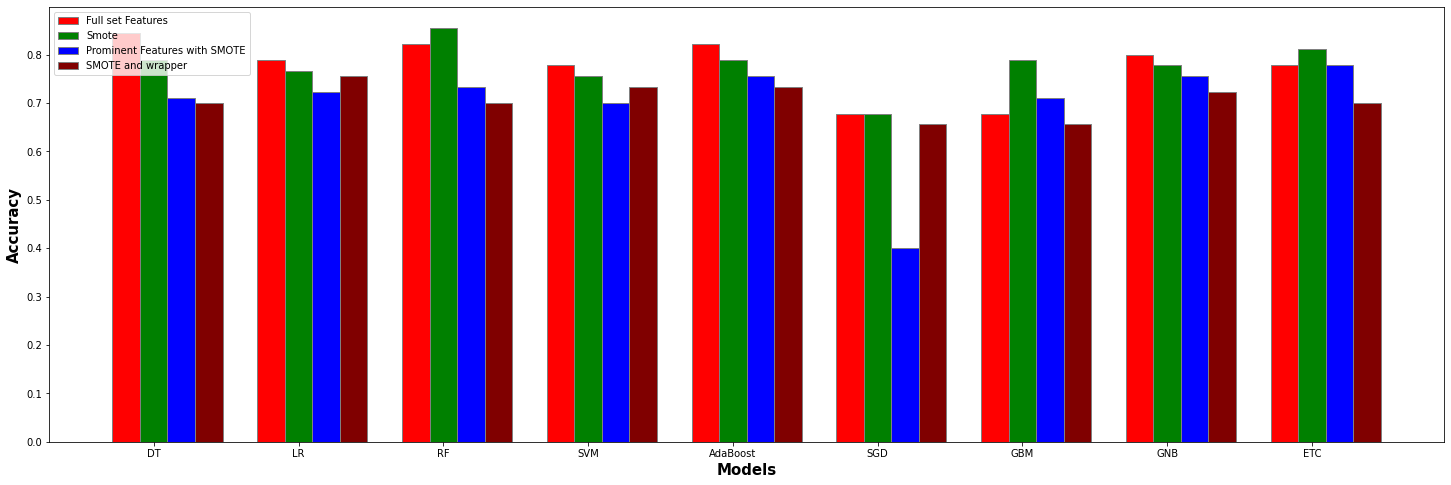

In [ ]:
#Accuracy

# set width of bar
barWidth = 0.19
fig = plt.subplots(figsize =(25, 8))

# set height of bar
Basic = [a11,a12,a13,a14,a15,a16,a17,a18,a19]
Smote = [a21,a22,a23,a24,a25,a26,a27,a28,a29]
Features = [a31,a32,a33,a34,a35,a36,a37,a38,a39]
wrapper=[a41,a42,a43,a44,a45,a46,a47,a48,a49]

# Set position of bar on X axis
br1 = np.arange(len(Basic))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]



# Make the plot
plt.bar(br1, Basic, color ='r', width = barWidth,
		edgecolor ='grey', label ='Full set Features')
plt.bar(br2, Smote, color ='g', width = barWidth,
		edgecolor ='grey', label ='Smote')
plt.bar(br3, Features, color ='b', width = barWidth,
		edgecolor ='grey', label ='Prominent Features with SMOTE')
plt.bar(br4, wrapper, color ='maroon', width = barWidth,
		edgecolor ='grey', label ='SMOTE and wrapper')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Basic))],
		['DT', 'LR', 'RF', 'SVM', 'AdaBoost', 'SGD', 'GBM', 'GNB', 'ETC'])

plt.legend()
plt.show()


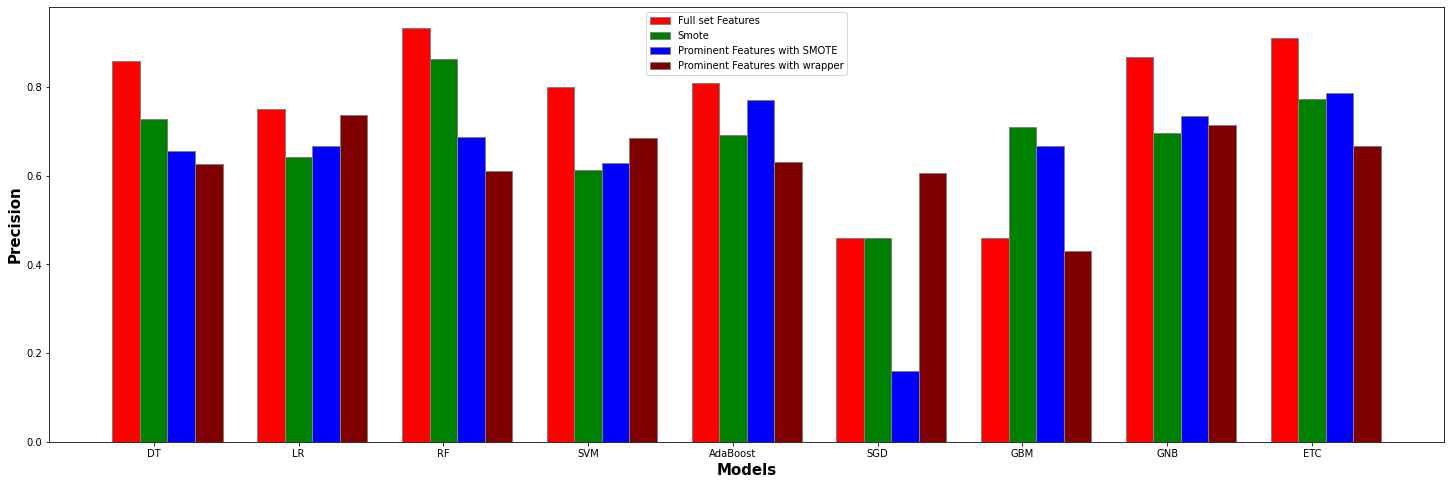

In [ ]:
#Precision

# set width of bar
barWidth = 0.19
fig = plt.subplots(figsize =(25, 8))

# set height of bar
Basic = [p11,p12,p13,p14,p15,p16,p17,p18,p19]
Smote = [p21,p22,p23,p24,p25,p26,p27,p28,p29]
Features = [p31,p32,p33,p34,p35,p36,p37,p38,p39]
wrapper=[p41,p42,p43,p44,p45,p46,p47,p48,p49]

# Set position of bar on X axis
br1 = np.arange(len(Basic))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]



# Make the plot
plt.bar(br1, Basic, color ='r', width = barWidth,
		edgecolor ='grey', label ='Full set Features')
plt.bar(br2, Smote, color ='g', width = barWidth,
		edgecolor ='grey', label ='Smote')
plt.bar(br3, Features, color ='b', width = barWidth,
		edgecolor ='grey', label ='Prominent Features with SMOTE')
plt.bar(br4, wrapper, color ='maroon', width = barWidth,
		edgecolor ='grey', label ='Prominent Features with wrapper')


# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Precision', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Basic))],
		['DT', 'LR', 'RF', 'SVM', 'AdaBoost', 'SGD', 'GBM', 'GNB', 'ETC'])

plt.legend()
plt.show()


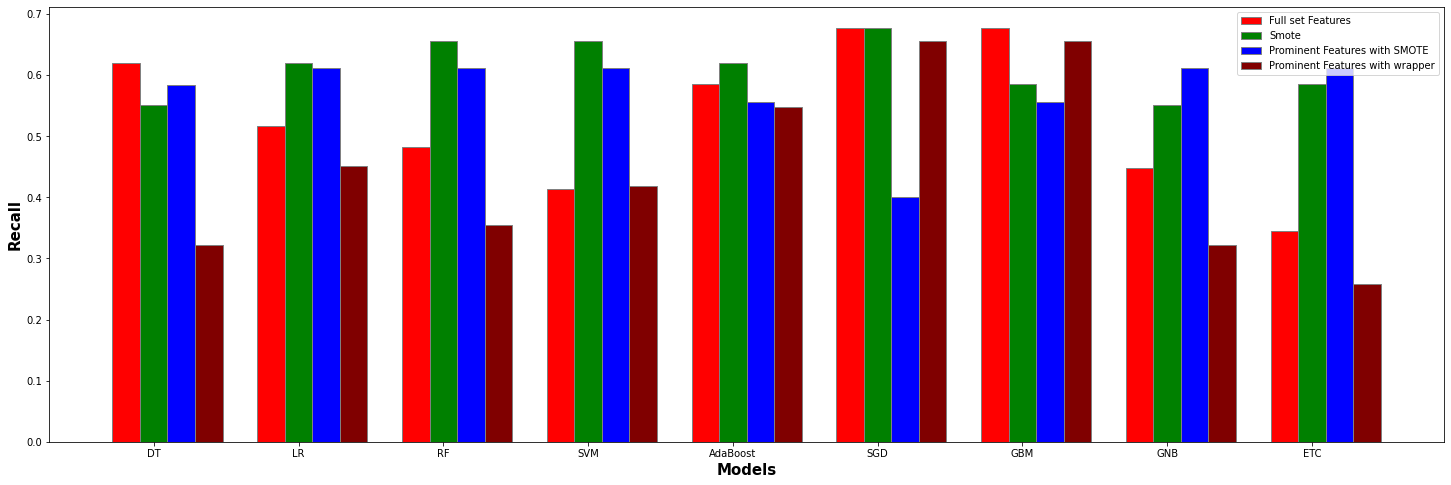

In [ ]:
#recall

# set width of bar
barWidth = 0.19
fig = plt.subplots(figsize =(25, 8))

# set height of bar
Basic = [r11,r12,r13,r14,r15,r16,r17,r18,r19]
Smote = [r21,r22,r23,r24,r25,r26,r27,r28,r29]
Features = [r31,r32,r33,r34,r35,r36,r37,r38,r39]
wrapper = [r41,r42,r43,r44,r45,r46,r47,r48,r49]

# Set position of bar on X axis
br1 = np.arange(len(Basic))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]


# Make the plot
plt.bar(br1, Basic, color ='r', width = barWidth,
		edgecolor ='grey', label ='Full set Features')
plt.bar(br2, Smote, color ='g', width = barWidth,
		edgecolor ='grey', label ='Smote')
plt.bar(br3, Features, color ='b', width = barWidth,
		edgecolor ='grey', label ='Prominent Features with SMOTE')
plt.bar(br4, wrapper, color ='maroon', width = barWidth,
		edgecolor ='grey', label ='Prominent Features with wrapper')


# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Recall', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Basic))],
		['DT', 'LR', 'RF', 'SVM', 'AdaBoost', 'SGD', 'GBM', 'GNB', 'ETC'])

plt.legend()
plt.show()


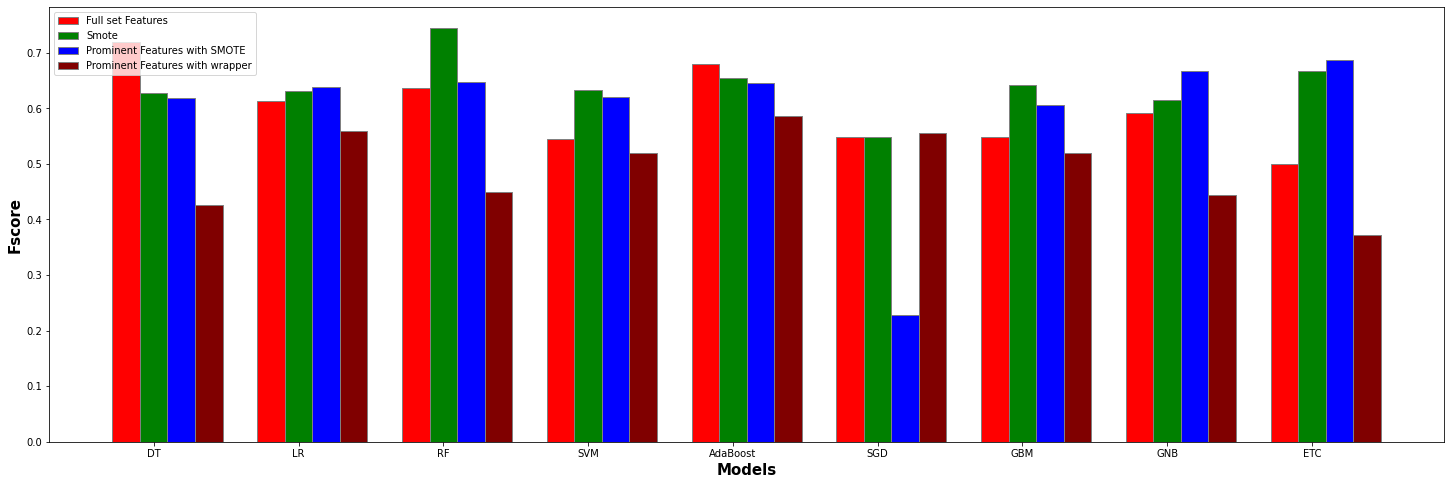

In [ ]:
#fscore

# set width of bar
barWidth = 0.19
fig = plt.subplots(figsize =(25, 8))

# set height of bar
Basic = [f11,f12,f13,f14,f15,f16,f17,f18,f19]
Smote = [f21,f22,f23,f24,f25,f26,f27,f28,f29]
Features = [f31,f32,f33,f34,f35,f36,f37,f38,f39]
wrapper = [f41,f42,f43,f44,f45,f46,f47,f48,f49]


# Set position of bar on X axis
br1 = np.arange(len(Basic))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, Basic, color ='r', width = barWidth,
		edgecolor ='grey', label ='Full set Features')
plt.bar(br2, Smote, color ='g', width = barWidth,
		edgecolor ='grey', label ='Smote')
plt.bar(br3, Features, color ='b', width = barWidth,
		edgecolor ='grey', label ='Prominent Features with SMOTE')
plt.bar(br4, wrapper, color ='maroon', width = barWidth,
		edgecolor ='grey', label ='Prominent Features with wrapper')


# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Fscore', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Basic))],
		['DT', 'LR', 'RF', 'SVM', 'AdaBoost', 'SGD', 'GBM', 'GNB', 'ETC'])

plt.legend()
plt.show()


In [ ]:
import pickle

# save the model to disk
filename = 'finalized_model39.sav'
pickle.dump(model39, open(filename, 'wb'))





In [ ]:
 #load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
 result = loaded_model.score(X_test, y_test)
 print(result)

0.7
